In [2]:
import pandas as pd
from sklearn.metrics import r2_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from utils.metrics import partsMetrics,allMetrics
from utils.plots import exp_vs_predict

In [3]:
df=pd.read_csv('processed_outliers.csv')
print('Data shape:',df.shape)

Data shape: (519, 7)


In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X.shape)
print(y.shape)

(519, 6)
(519,)


In [4]:
param_grid={
    'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
    'n_estimators': [10,50,100,200,300],
    'max_features': [None,1,2,3,4,5,'sqrt','log2'],
    'max_depth': [None,2,4,5,6],
    'min_samples_leaf': [1,3,4,5],
    'min_samples_split': [2,4,6,8,10],
    'bootstrap': [True,False],
    'min_weight_fraction_leaf': [0.0,.1]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def train_model(X_train,y_train):
    reg = RandomForestRegressor(random_state=0,n_jobs=-1)
    grid=GridSearchCV(reg,param_grid,cv=5,scoring=make_scorer(r2_score),n_jobs=2)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    return grid

In [5]:
model=train_model(X_train,y_train)

c:\Users\ska73\.virtualenvs\code-mydQ8Wua\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'bootstrap': False, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300}
0.9204277319708662


In [5]:
best_params={'bootstrap': False, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300}
reg=RandomForestRegressor(**best_params,random_state=0)
partsMetrics(df,reg)

train rmse: 0.19116476695851473
val rmse: 2.9892450142310256
test rmse: 2.6213381739772594

train si: 0.01558616220592543
val si: 0.24389291844259733
test si: 0.1883639674522455

train r2: 0.999753919267382
val r2: 0.9462194842788728
test r2: 0.9664913826309469

train mape: 0.015318898948164926
val mape: 43.04631651710016
test mape: 136.95080844141225


In [6]:
allMetrics(df,reg)

all rmse: 0.1724664109252562
all si: 0.013876224655387653
all r2: 0.9998112805144236
all mape: 0.013334855546481025


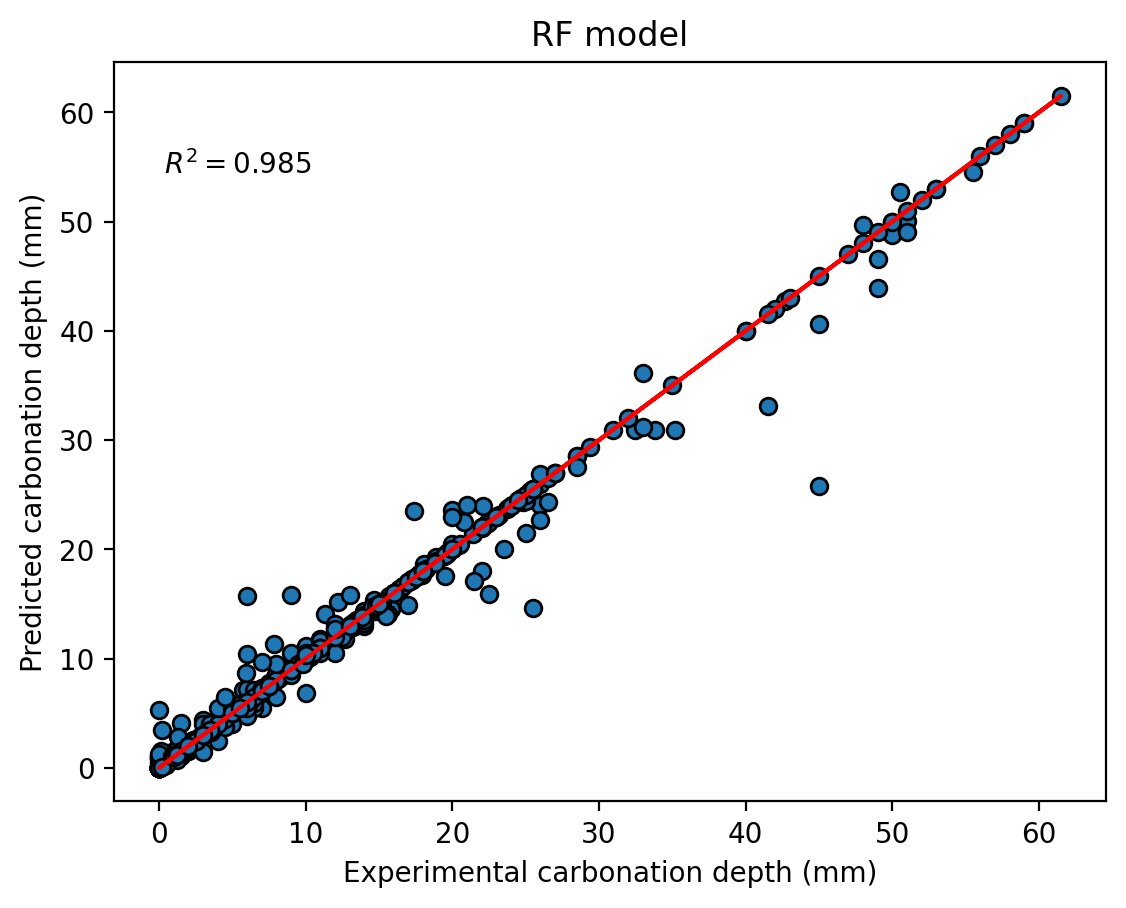

In [7]:
exp_vs_predict(df,reg,'RF model')